# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/visualization`
### Do One.

In [1]:
! git clone https://github.com/ds4e/visualization

Cloning into 'visualization'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 35 (delta 3), reused 2 (delta 2), pack-reused 30 (from 1)
Receiving objects: 100% (35/35), 7.16 MiB | 16.52 MiB/s, done.
Resolving deltas: 100% (6/6), done.


**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#1
df = pd.read_csv('/content/visualization/assignment/data/college_completion.csv')
#2
dimensions = df.shape #finds dimensions
print(f"Dimensions of the data: {dimensions}")
num_observations = df.shape[0] #finds number of observations
print(f"Number of observations: {num_observations}")
variables = df.columns #finds number of cols (variables)
print(f"Variables (columns) included: {variables}")
print("First few rows of the data:")
print(df.head())

Dimensions of the data: (3798, 63)
Number of observations: 3798
Variables (columns) included: Index(['index', 'unitid', 'chronname', 'city', 'state', 'level', 'control',
       'basic', 'hbcu', 'flagship', 'long_x', 'lat_y', 'site', 'student_count',
       'awards_per_value', 'awards_per_state_value', 'awards_per_natl_value',
       'exp_award_value', 'exp_award_state_value', 'exp_award_natl_value',
       'exp_award_percentile', 'ft_pct', 'fte_value', 'fte_percentile',
       'med_sat_value', 'med_sat_percentile', 'aid_value', 'aid_percentile',
       'endow_value', 'endow_percentile', 'grad_100_value',
       'grad_100_percentile', 'grad_150_value', 'grad_150_percentile',
       'pell_value', 'pell_percentile', 'retain_value', 'retain_percentile',
       'ft_fac_value', 'ft_fac_percentile', 'vsa_year',
       'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first',
       'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first',
       'vsa_grad_after6_first', 'vsa_grad_else

Cross-tabulation between 'control' and 'level':
level                   2-year  4-year
control                               
Private for-profit         465     527
Private not-for-profit      68    1180
Public                     926     632

Looks like Private not-for-profit colleges are very likely to be 4-year, while public colleges are more likely to be 2-year. 
Private for-profit colleges are similarly distributed, with the majority being 4-year.


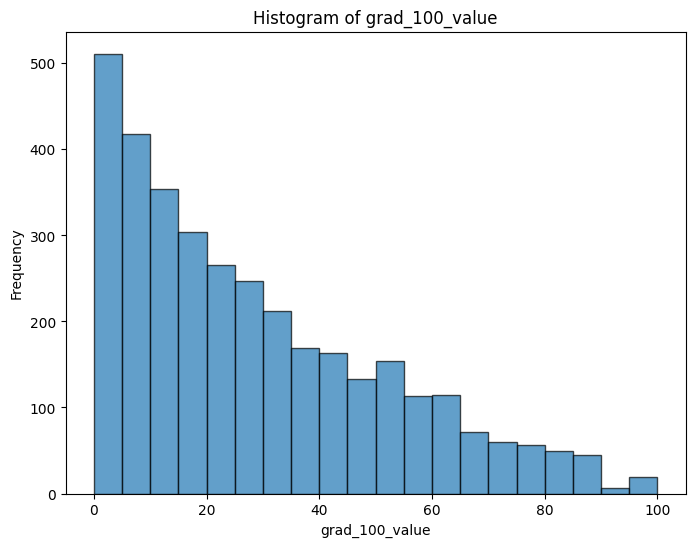

<ipython-input-25-3e29218ec97b>:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(grad_value, shade=True, color='blue')


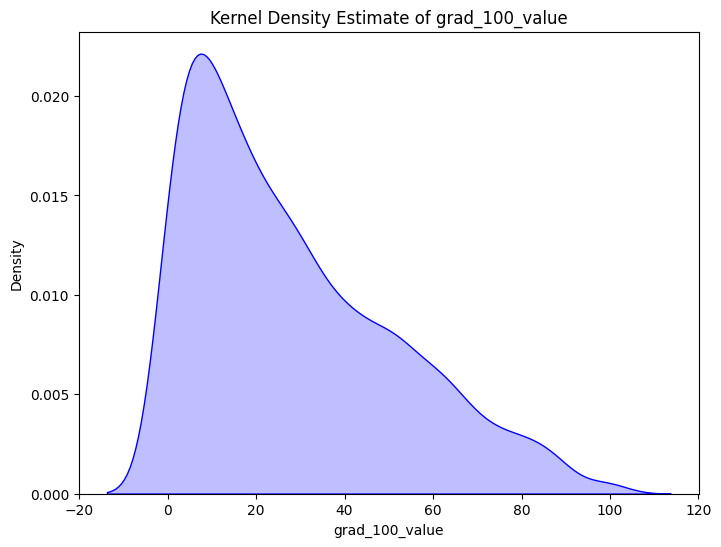

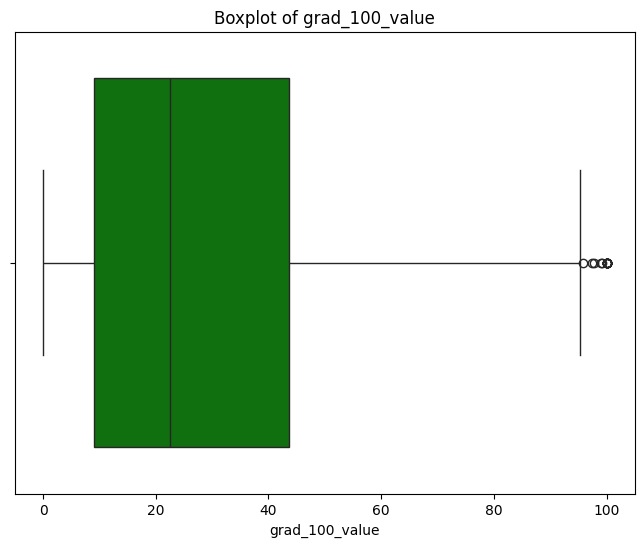

Statistical Description of grad_100_value:
count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64


In [25]:
#3
cross_tab = pd.crosstab(df['control'], df['level']) #crosstab function
print("Cross-tabulation between 'control' and 'level':")
print(cross_tab)
print('\nLooks like Private not-for-profit colleges are very likely to be 4-year, while public colleges are more likely to be 2-year. \nPrivate for-profit colleges are similarly distributed, with the majority being 4-year.')

#4
grad_value = df['grad_100_value']
# histogram
plt.figure(figsize=(8, 6))
plt.hist(grad_value, bins=20, edgecolor='black', alpha=0.7)
plt.title("Histogram of grad_100_value")
plt.xlabel("grad_100_value")
plt.ylabel("Frequency")
plt.show()
# KDE plot
plt.figure(figsize=(8, 6))
sns.kdeplot(grad_value, shade=True, color='blue')
plt.title("Kernel Density Estimate of grad_100_value")
plt.xlabel("grad_100_value")
plt.ylabel("Density")
plt.show()
# boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=grad_value, color='green')
plt.title("Boxplot of grad_100_value")
plt.xlabel("grad_100_value")
plt.show()
# satistical description
description = grad_value.describe()
print("Statistical Description of grad_100_value:")
print(description)


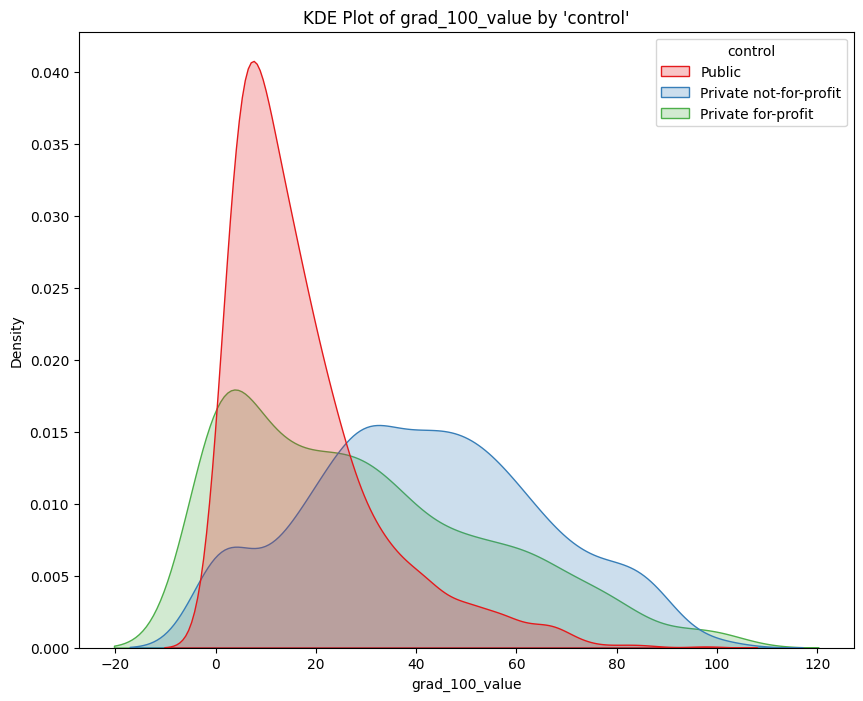

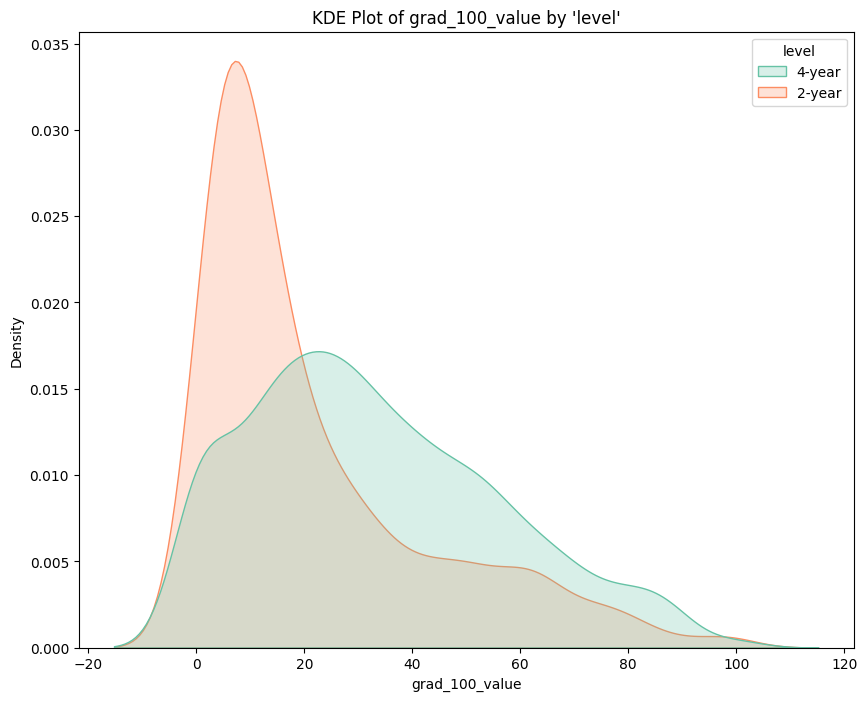

When grouped by control, Private not-for-profit colleges are the only ones that don't skew right, and thus have the best graduation rate. 
Meanwhile, sorted by level, 2-year colleges are skewed heavily to the left, meaning 4-year colleges have the best graduation rates.


In [26]:
#5
plt.figure(figsize=(10, 8))
# KDE plot for different 'control' groups
sns.kdeplot(data=df, x='grad_100_value', hue='control', fill=True, common_norm=False, palette='Set1')
plt.title("KDE Plot of grad_100_value by 'control'")
plt.xlabel("grad_100_value")
plt.ylabel("Density")
plt.show()
# KDE plot for different 'level' groups
plt.figure(figsize=(10, 8))
sns.kdeplot(data=df, x='grad_100_value', hue='level', fill=True, common_norm=False, palette='Set2')
plt.title("KDE Plot of grad_100_value by 'level'")
plt.xlabel("grad_100_value")
plt.ylabel("Density")
plt.show()
# describe what I see:
print('When grouped by control, Private not-for-profit colleges are the only ones that don\'t skew right, and thus have the best graduation rate. \nMeanwhile, sorted by level, 2-year colleges are skewed heavily to the left, meaning 4-year colleges have the best graduation rates.')

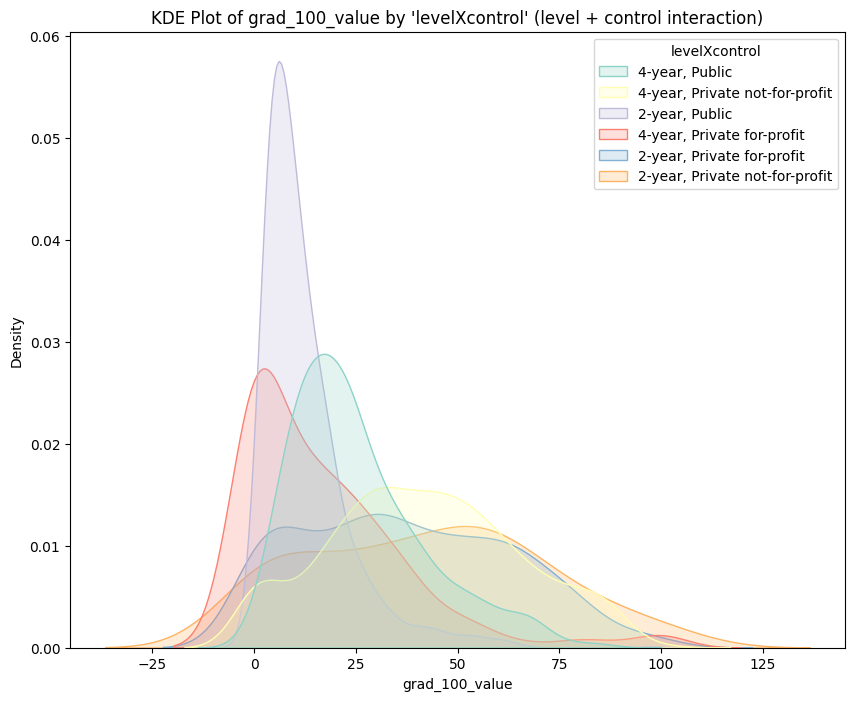

It looks like the best graduation rates occur at 2-year, Private not-for-profit colleges; their grad values are actually kinda skewed right.


In [27]:
#6
# create said var
df['levelXcontrol'] = df['level'] + ', ' + df['control']
# grouped KDE
plt.figure(figsize=(10, 8))
sns.kdeplot(data=df, x='grad_100_value', hue='levelXcontrol', fill=True, common_norm=False, palette='Set3')
plt.title("KDE Plot of grad_100_value by 'levelXcontrol' (level + control interaction)")
plt.xlabel("grad_100_value")
plt.ylabel("Density")
plt.show()
# describe
print('It looks like the best graduation rates occur at 2-year, Private not-for-profit colleges; their grad values are actually kinda skewed right.')

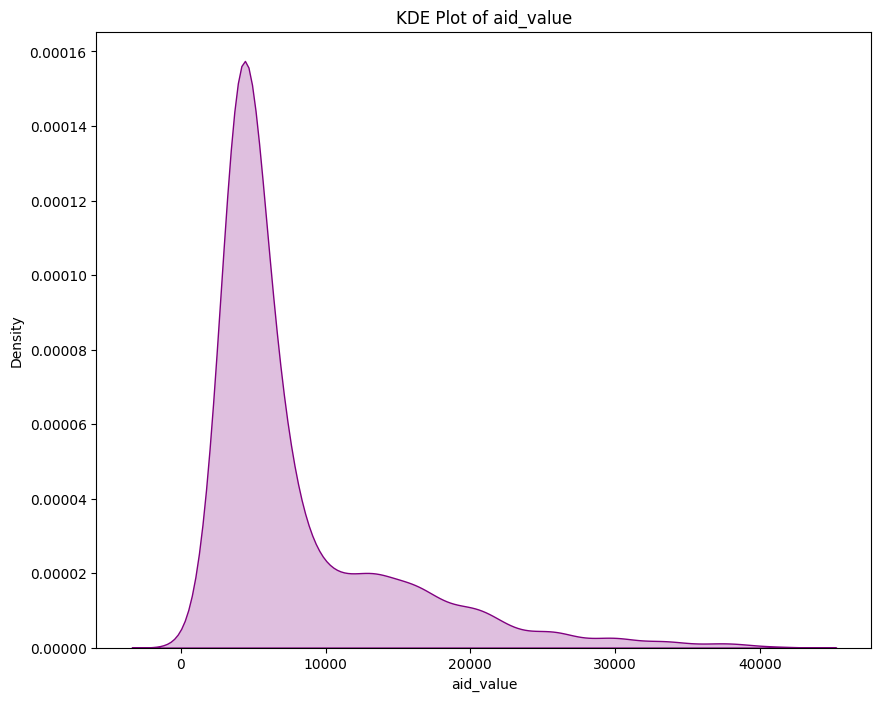

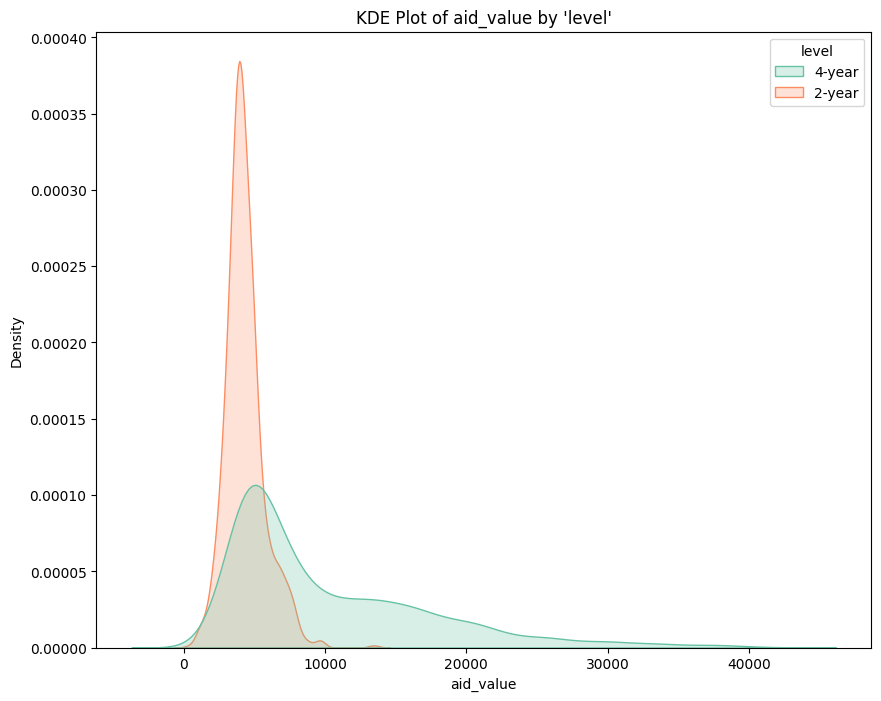

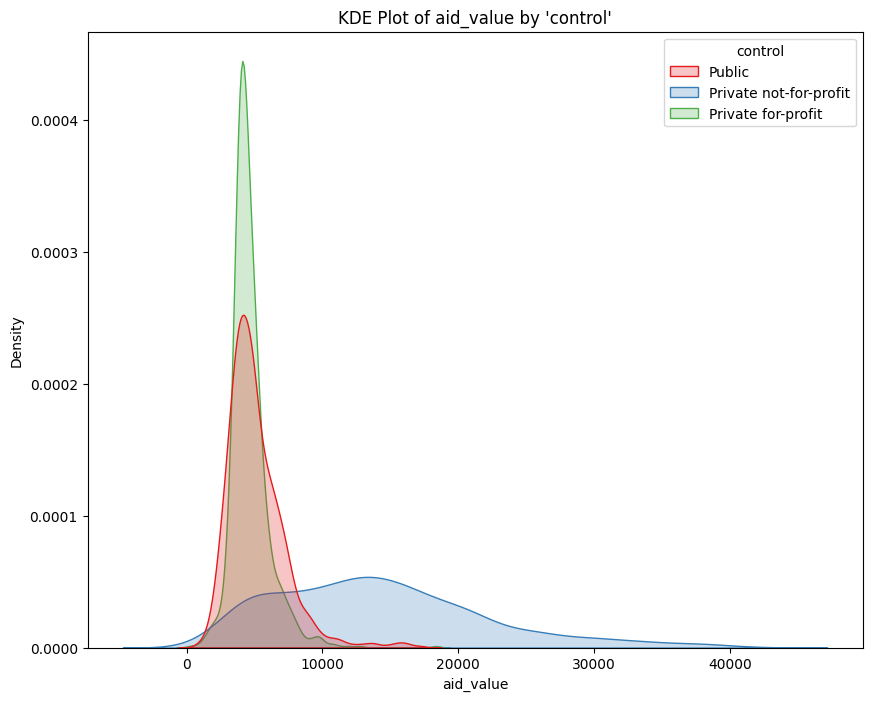


The aid value skews very low, mostly at 2-year universities, and very very much at private for-profit and public universities (who may not wish to give aid for financial reasons).

Grouped statistical description by 'level':
         count          mean          std    min     25%     50%      75%  \
level                                                                       
2-year  1458.0   4310.878601  1384.045631  294.0  3485.5  4113.0   4890.0   
4-year  2339.0  10235.379222  7227.369167  902.0  4830.5  7222.0  14046.0   

            max  
level            
2-year  13654.0  
4-year  41580.0  

Grouped statistical description by 'control':
                         count          mean          std    min      25%  \
control                                                                     
Private for-profit       991.0   4632.206862  1399.121259  294.0  3861.50   
Private not-for-profit  1248.0  14180.722756  7772.700998  902.0  8325.00   
Public                  1558.0   5094.

In [28]:
#7
# KDE of aid_value
plt.figure(figsize=(10, 8))
sns.kdeplot(data=df, x='aid_value', fill=True, color='purple', common_norm=False)
plt.title("KDE Plot of aid_value")
plt.xlabel("aid_value")
plt.ylabel("Density")
plt.show()
# group by 'level'
plt.figure(figsize=(10, 8))
sns.kdeplot(data=df, x='aid_value', hue='level', fill=True, common_norm=False, palette='Set2')
plt.title("KDE Plot of aid_value by 'level'")
plt.xlabel("aid_value")
plt.ylabel("Density")
plt.show()
# group by 'control'
plt.figure(figsize=(10, 8))
sns.kdeplot(data=df, x='aid_value', hue='control', fill=True, common_norm=False, palette='Set1')
plt.title("KDE Plot of aid_value by 'control'")
plt.xlabel("aid_value")
plt.ylabel("Density")
plt.show()
print('\nThe aid value skews very low, mostly at 2-year universities, and very very much at private for-profit and public universities (who may not wish to give aid for financial reasons).\n')
# grouped descriptions by level
level_group = df.groupby('level')['aid_value'].describe()
print("Grouped statistical description by 'level':")
print(level_group)
# grouped descriptions by control
control_group = df.groupby('control')['aid_value'].describe()
print("\nGrouped statistical description by 'control':")
print(control_group)

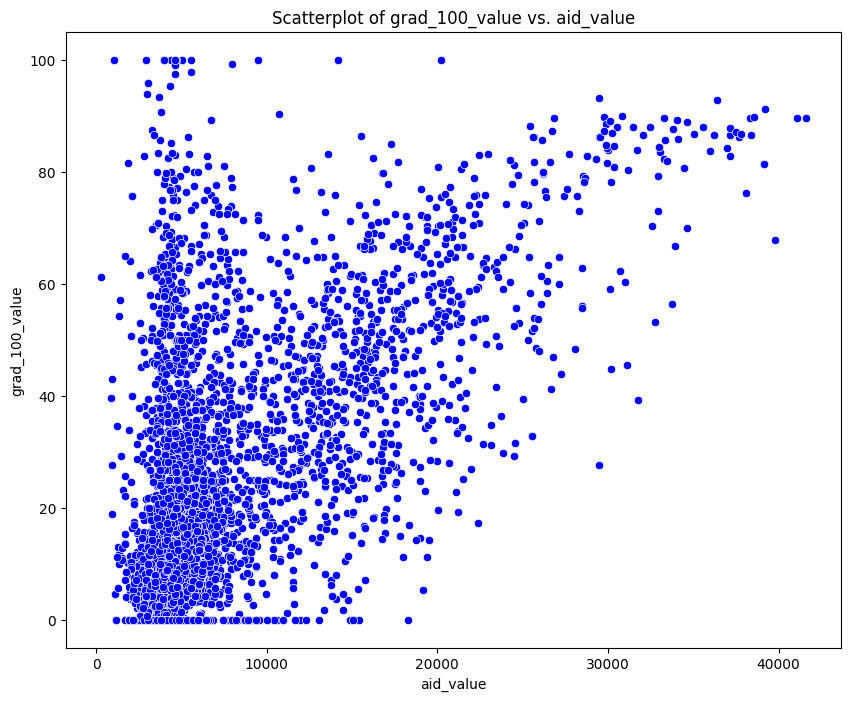

It is very densely visible that colleges with low aid have low graduation rates.


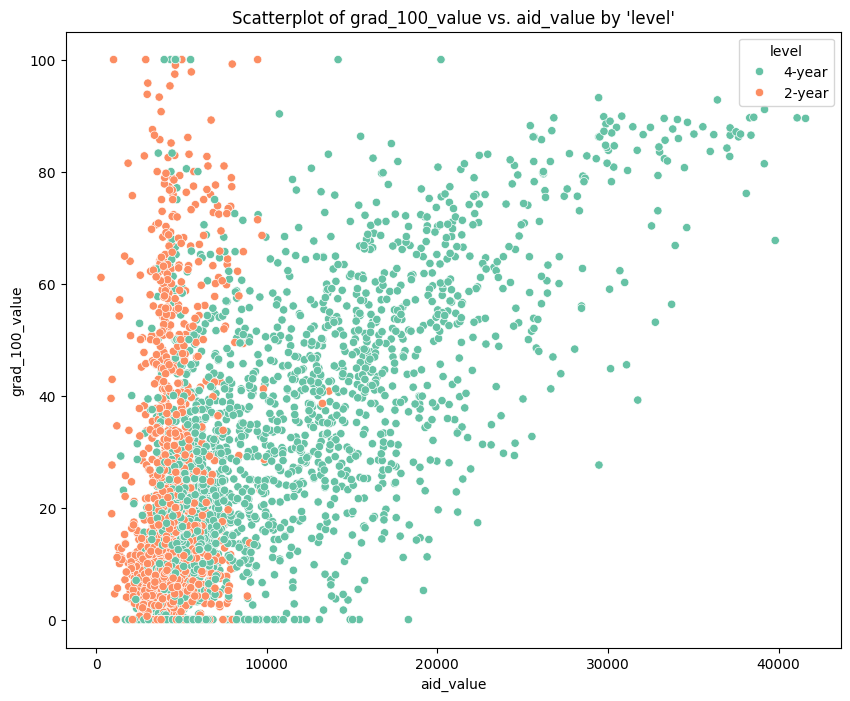

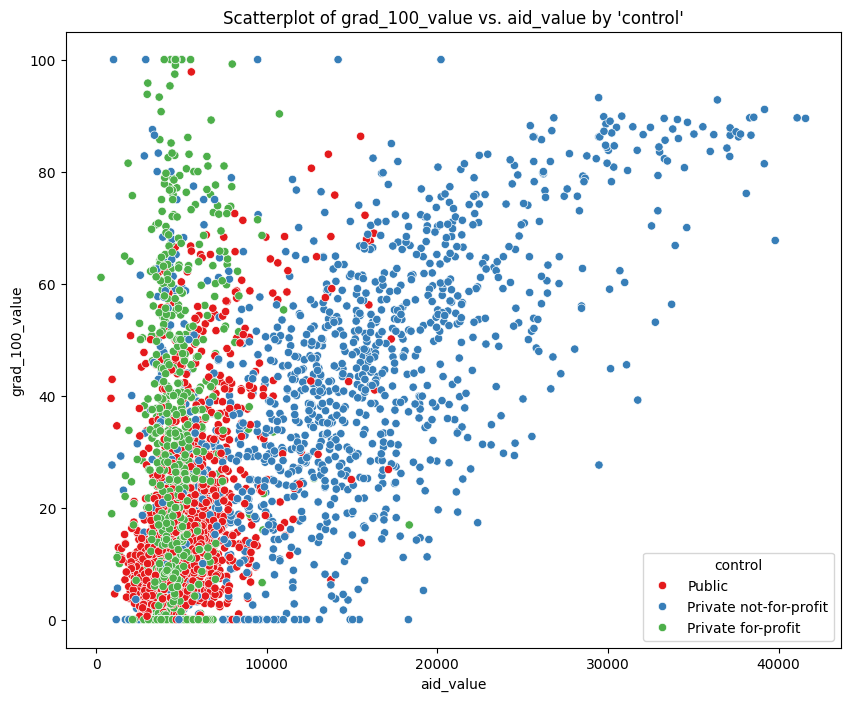

Aid seems to increase graduation rates at 4-year colleges (they really just recieve enough aid to even tell)
and primarily at private not-for profit universities (which also make up most datapoints that recieve large amounts of aid).


In [30]:
#8
# scatterplot of 'grad_100_value' vs. 'aid_value'
plt.figure(figsize=(10, 8))
sns.scatterplot(x='aid_value', y='grad_100_value', data=df, color='blue')
plt.title("Scatterplot of grad_100_value vs. aid_value")
plt.xlabel("aid_value")
plt.ylabel("grad_100_value")
plt.show()
print('It is very densely visible that colleges with low aid have low graduation rates.')
# scatterplot grouped by 'level'
plt.figure(figsize=(10, 8))
sns.scatterplot(x='aid_value', y='grad_100_value', hue='level', data=df, palette='Set2')
plt.title("Scatterplot of grad_100_value vs. aid_value by 'level'")
plt.xlabel("aid_value")
plt.ylabel("grad_100_value")
plt.show()
# scatterplot grouped by 'control'
plt.figure(figsize=(10, 8))
sns.scatterplot(x='aid_value', y='grad_100_value', hue='control', data=df, palette='Set1')
plt.title("Scatterplot of grad_100_value vs. aid_value by 'control'")
plt.xlabel("aid_value")
plt.ylabel("grad_100_value")
plt.show()
print('Aid seems to increase graduation rates at 4-year colleges (they really just recieve enough aid to even tell)')
print('and primarily at private not-for profit universities (which also make up most datapoints that recieve large amounts of aid).')

**Q2.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them?
7. Create a scatter plot, and describe the relationship you see.
8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

**Q3.** This is a case study about understanding and visualizing risk over time, involving a dataset with information about breast cancer mortality rates over time, conditional on different treatments.

1. Load the `./data/Breast Cancer METABRIC.csv` dataset. It has a bunch of interesting variables, but the mains of interest for this question are `Overall Survival (Months)`, which is  and `Overall Survival Survival Status`, which records whether the patient is Alive or Deceased.
2. Make one kernel density plot of `Overall Survival (Months)`, and a second conditional on `Overall Survival Status`. Interpret these plots. What patterns do you see?

3. The **hazard rate** gives the instantaneous risk of an event occurring, given that it hasn't already happened. It is defined as
$$
h(t) = \dfrac{f(t)}{1-F(t)}
$$
where $F(t)$ is the distribution of arrival times and $f(t)=F'(t)$ is the density of arrival times. Roughly, conditional on $T \ge t$, what is the probability that $T=t$? The cumulative hazard is given by
$$
H(t) = \int_0^t h(z) dz.
$$
The following function computes the hazard rate and cumulative hazard using something called the Nelson-Ahlen estimator. Run your data through it. Interpret the plots for the hazard rate and cumulative hazard rate. What patterns do you see?

```
def hazard(df):
    """ Compute cumulative hazard rate using Nelson-Ahlen estimator. """
    at_risk = df.shape[0]
    arrivals = df['survival'].sort_values().dropna().tolist()
    hazard_rate = []
    times = []
    for t in arrivals:
        select = (df['survival']==t)*(df['Overall Survival Status']=='Deceased')
        deaths_t = df[select].shape[0]
        if deaths_t > 0:
            hazard_rate.append(deaths_t/at_risk)
            times.append(t)
            at_risk -= deaths_t
    cumulative_hazard = np.cumsum(hazard_rate)
    return cumulative_hazard, times, hazard_rate
```

4. There are lots of additional categorical variables in the METABRIC dataset. Pick a categorical variable, and plot the hazard rate and cumulative hazard for each category. Do you see any interesting patterns? Is one group more likely to survive, or do their hazard rates cross over time?
5. These plots are very helpful for understanding how patients respond to treatment. Discuss how they might be used in practice, to help doctors and patients make decisions about care.

**Q4.** Write your own function to make a kernel density plot.

- The user should pass in a Pandas series or Numpy array.
- The default kernel should be Gaussian, but include the uniform/bump and Epanechnikov as alternatives.
- The default bandwidth should be the Silverman plug-in, but allow the user to specify an alternative.
- You can use Matplotlib or Seaborn's `.lineplot`, but not an existing function that creates kernel density plots.

You will have to make a lot of choices and experiment with getting errors. Embrace the challenge and track your choices in the comments in your code.

Use a data set from class to show that your function works, and compare it with the Seaborn `kdeplot`.

We covered the Gaussian,
$$
k(z) = \dfrac{1}{\sqrt{2\pi}}e^{-z^2/2}
$$
and uniform
$$
k(z) = \begin{cases}
\frac{1}{2}, & |z| \le 1 \\
0, & |z|>1
\end{cases}
$$
kernels in class, but the Epanechnikov kernel is
$$
k(z) = \begin{cases}
\frac{3}{4} (1-z^2), & |z| \le 1 \\
0, & |z|>1.
\end{cases}
$$

In order to make your code run reasonably quickly, consider using the `pdist` or `cdist` functions from SciPy to make distance calculations for arrays of points. The other leading alternative is to thoughtfully use NumPy's broadcasting features. Writing `for` loops will be slow, but that's fine.